In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sympy.printing.pytorch import torch

In [2]:
words = open("names.txt",'r').read().splitlines()

In [55]:
len(words)

32033

In [58]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [59]:
block_size = 3

def build_dataset(words):
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22841, 3]) torch.Size([22841])
torch.Size([22725, 3]) torch.Size([22725])


In [98]:
C = torch.randn((27, 10))

In [99]:
W1 = torch.randn((30, 200))
b1 = torch.randn(200)

In [100]:
W2 = torch.randn((200,27))
b2 = torch.randn(27)

In [101]:
parameters = [C, W1, b1, W2, b2]

In [102]:
sum(p.nelement() for p in parameters)

11897

In [103]:
for p in parameters:
    p.requires_grad = True

In [114]:
for _ in range(30000):
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr [ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data +=-0.01*p.grad
loss.item()

2.203707695007324

In [115]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1636, grad_fn=<NllLossBackward0>)

In [116]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1292, grad_fn=<NllLossBackward0>)

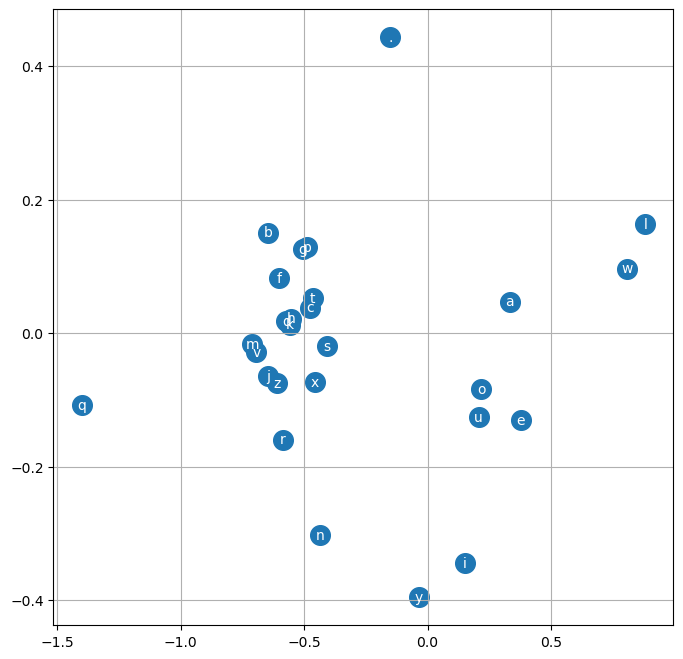

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [117]:
emb = C[Xte]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1780, grad_fn=<NllLossBackward0>)

In [118]:
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
      emb = C[torch.tensor([context])] # ()
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

leigh.
jonrek.
maorgael.
bloralyangyea.
mily.
sulles.
jo.
nay.
jin.
aylalez.
lellissa.
ani.
sulander.
daannicodwan.
nilo.
samirwa.
jhovyngeld.
athu.
kuon.
khi.
